In [238]:
import pandas
import numpy
from scipy import stats
import os

In [239]:
files = os.listdir("final")
flattened = pandas.read_csv("final\\flattened_2000.csv", low_memory=False)
flattened = flattened = flattened[['HISPANIC','EDUCATION', 'income', 'AGE','RETAIL','COMMUNITY_SERVICES', 'FINANCE', 'WHOLESALE','DOMESTIC_SERVICES', 'ENTERTAINMENT', 'ADMINISTRATION', 'UTILITIES','EXTRACTION', 'INFORMATION_TECH', 'CONSTRUCTION', 'SERVICES','MILITARY', 'UNEMPLOYED', 'MANUFACTURING', 'AGRICULTURE', 'MEDICAL','TRANSPORT', 'White', 'Black or African American', 'American Indian','Alaska Native', 'American Indian and Alaska Native tribes specified','Asian', 'Native Hawaiian', 'Some Other Race', 'Two or More Races', 'Private profit company employee','Local government employee', 'Private charitable company employee','Federal government employee', 'State government employee','Self-employed own business', 'Self-employed not own business','Unemployed', 'Non paying family business', 'Male', 'Female']]
df_for_regression_x = flattened[['HISPANIC','EDUCATION', 'AGE','RETAIL','COMMUNITY_SERVICES', 'FINANCE', 'WHOLESALE','DOMESTIC_SERVICES', 'ENTERTAINMENT', 'ADMINISTRATION', 'UTILITIES','EXTRACTION', 'INFORMATION_TECH', 'CONSTRUCTION', 'SERVICES','MILITARY', 'UNEMPLOYED', 'MANUFACTURING', 'AGRICULTURE', 'MEDICAL','TRANSPORT', 'White', 'Black or African American', 'American Indian','Alaska Native', 'American Indian and Alaska Native tribes specified','Asian', 'Native Hawaiian', 'Some Other Race', 'Two or More Races', 'Private profit company employee','Local government employee', 'Private charitable company employee','Federal government employee', 'State government employee','Self-employed own business', 'Self-employed not own business','Unemployed', 'Non paying family business', 'Male', 'Female']]
column_list = list(df_for_regression_x.columns)
column_list.append("YEAR")

In [241]:
all_coeffs = []
for file_name in files:
    year = file_name[-8:-4]
    print("Working on file: ",file_name," for year: ",year)
    
    flattened = pandas.read_csv("final\\"+file_name, low_memory=False)
    flattened = flattened[['HISPANIC','EDUCATION', 'income', 'AGE','RETAIL','COMMUNITY_SERVICES', 'FINANCE', 'WHOLESALE','DOMESTIC_SERVICES', 'ENTERTAINMENT', 'ADMINISTRATION', 'UTILITIES','EXTRACTION', 'INFORMATION_TECH', 'CONSTRUCTION', 'SERVICES','MILITARY', 'UNEMPLOYED', 'MANUFACTURING', 'AGRICULTURE', 'MEDICAL','TRANSPORT', 'White', 'Black or African American', 'American Indian','Alaska Native', 'American Indian and Alaska Native tribes specified','Asian', 'Native Hawaiian', 'Some Other Race', 'Two or More Races', 'Private profit company employee','Local government employee', 'Private charitable company employee','Federal government employee', 'State government employee','Self-employed own business', 'Self-employed not own business','Unemployed', 'Non paying family business', 'Male', 'Female']]
    if year != '2013' and year != '2014':
        flattened = flattened[flattened.AGE != 'AGE']

    flattened.EDUCATION = flattened.EDUCATION.astype(float)
    flattened.EDUCATION = stats.zscore(flattened.EDUCATION)

    flattened.AGE = flattened.AGE.astype(float)
    flattened.AGE = stats.zscore(flattened.AGE)

    flattened.income = flattened.income.astype(float)
    flattened.income = stats.zscore(flattened.income)

    #df_for_regression = df_for_regression[df_for_regression.D != 'GENDER']
    #len(flattened)

    df_for_regression_y = flattened[['income']]
    df_for_regression_x = flattened[['HISPANIC','EDUCATION', 'AGE','RETAIL','COMMUNITY_SERVICES', 'FINANCE', 'WHOLESALE','DOMESTIC_SERVICES', 'ENTERTAINMENT', 'ADMINISTRATION', 'UTILITIES','EXTRACTION', 'INFORMATION_TECH', 'CONSTRUCTION', 'SERVICES','MILITARY', 'UNEMPLOYED', 'MANUFACTURING', 'AGRICULTURE', 'MEDICAL','TRANSPORT', 'White', 'Black or African American', 'American Indian','Alaska Native', 'American Indian and Alaska Native tribes specified','Asian', 'Native Hawaiian', 'Some Other Race', 'Two or More Races', 'Private profit company employee','Local government employee', 'Private charitable company employee','Federal government employee', 'State government employee','Self-employed own business', 'Self-employed not own business','Unemployed', 'Non paying family business', 'Male', 'Female']]
    column_list = list(df_for_regression_x.columns)
    column_list.append("YEAR")

    from sklearn import datasets, linear_model
    from sklearn.metrics import mean_squared_error, r2_score

    regr = linear_model.Ridge()
    regr.fit(df_for_regression_x, df_for_regression_y)
    
    coeffs = list(regr.coef_[0])
    coeffs.append(year)
    
    all_coeffs.append(coeffs)
coeff_df = pandas.DataFrame(all_coeffs, columns = column_list)
coeff_df.to_csv("all_year_coeffs\\all_year_coeff.csv", index=False)



Working on file:  flattened_2000.csv  for year:  2000
Working on file:  flattened_2001.csv  for year:  2001
Working on file:  flattened_2002.csv  for year:  2002
Working on file:  flattened_2003.csv  for year:  2003
Working on file:  flattened_2004.csv  for year:  2004
Working on file:  flattened_2005.csv  for year:  2005
Working on file:  flattened_2006.csv  for year:  2006
Working on file:  flattened_2007.csv  for year:  2007
Working on file:  flattened_2008.csv  for year:  2008
Working on file:  flattened_2009.csv  for year:  2009
Working on file:  flattened_2010.csv  for year:  2010
Working on file:  flattened_2011.csv  for year:  2011
Working on file:  flattened_2012.csv  for year:  2012
Working on file:  flattened_2013.csv  for year:  2013
Working on file:  flattened_2014.csv  for year:  2014
Working on file:  flattened_2015.csv  for year:  2015
Working on file:  flattened_2016.csv  for year:  2016


In [278]:
# prepare the dates index
mdata = pandas.read_csv("all_year_coeffs\\all_year_coeff.csv", low_memory = False)

white_hisp = mdata[["HISPANIC", "White"]]
hisp_white_diff = np.diff(white_hisp, axis = 1)

white_black = mdata[["Black or African American", "White"]]
black_white_diff = np.diff(white_black, axis = 1)

years = list(mdata["YEAR"])

mdata = pandas.DataFrame(hisp_white_diff, columns = ["Coefficient Disparity (Whites minus Hispanics)"])
mdata["Coefficient Disparity (Whites minus Blacks/African Americans)"] = black_white_diff

mdata["YEAR"] = years

import statsmodels.api as sm

from statsmodels.tsa.api import VAR, DynamicVAR

# prepare the dates index
dates = mdata[['YEAR']].astype(str)

yearly = dates["YEAR"]

from statsmodels.tsa.base.datetools import dates_from_str

yearly = dates_from_str(yearly)
yearly

mdata = mdata[["Coefficient Disparity (Whites minus Hispanics)", "Coefficient Disparity (Whites minus Blacks/African Americans)"]]
#numpy.diff(mdata, axis = 0)

mdata.index = pandas.DatetimeIndex(yearly)
data = mdata#.diff().dropna()

data

,Coefficient Disparity (Whites minus Hispanics),Coefficient Disparity (Whites minus Blacks/African Americans)
2000-12-31,0.736483,0.131381
2001-12-31,0.738997,0.133145
2002-12-31,0.748194,0.135450
2003-12-31,0.728494,0.139386
2004-12-31,0.753319,0.148289
2005-12-31,0.669220,0.150618
2006-12-31,0.714579,0.156846
2007-12-31,0.731979,0.150182
2008-12-31,0.792365,0.168269
2009-12-31,0.882278,0.163645


In [279]:
# make a VAR model
model = VAR(data)

results = model.fit(2)

results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 17, Dec, 2017
Time:                     03:43:11
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -12.7389
Nobs:                     15.0000    HQIC:                  -13.2160
Log likelihood:           66.5141    FPE:                1.92996e-06
AIC:                     -13.2110    Det(Omega_mle):     1.08560e-06
--------------------------------------------------------------------
Results for equation Coefficient Disparity (Whites minus Hispanics)
                                                                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------------------------------------------
const                                                                    1.7836

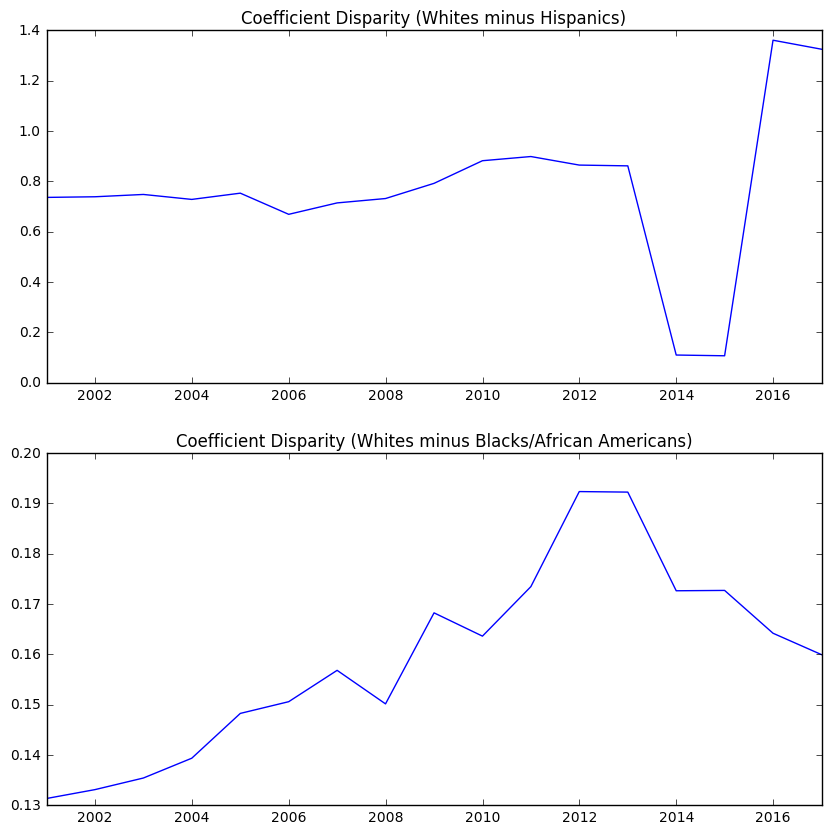

In [280]:
import matplotlib.pyplot as plt
results.plot()
plt.show()

In [286]:
#results.plot_acorr()
#plt.show()

In [304]:
model.select_order(4)

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -10.37       -10.28    3.143e-05       -10.39
1       -10.70       -10.44    2.295e-05       -10.75
2       -13.02       -12.59    2.407e-06       -13.11
3       -13.04       -12.43    2.791e-06       -13.17
4      -14.45*      -13.67*   1.003e-06*      -14.61*
* Minimum



{'aic': 4, 'bic': 4, 'fpe': 4, 'hqic': 4}

In [305]:
results = model.fit(maxlags=2, ic='hqic')
lag_order = results.k_ar
lag_order

2

In [306]:
results.forecast(data.values[-lag_order:], 15)

array([[ 0.00608432,  0.17463335],
       [ 0.08504541,  0.17793455],
       [ 1.42757401,  0.16320711],
       [ 1.31566162,  0.1604786 ],
       [-0.05057778,  0.17577295],
       [ 0.09389343,  0.17836883],
       [ 1.48232293,  0.16284262],
       [ 1.30327657,  0.160634  ],
       [-0.10762163,  0.17656478],
       [ 0.10670428,  0.17849655],
       [ 1.53936519,  0.16225084],
       [ 1.28835978,  0.16067354],
       [-0.1658132 ,  0.17727888],
       [ 0.1229337 ,  0.17852033],
       [ 1.59808208,  0.16158021]])

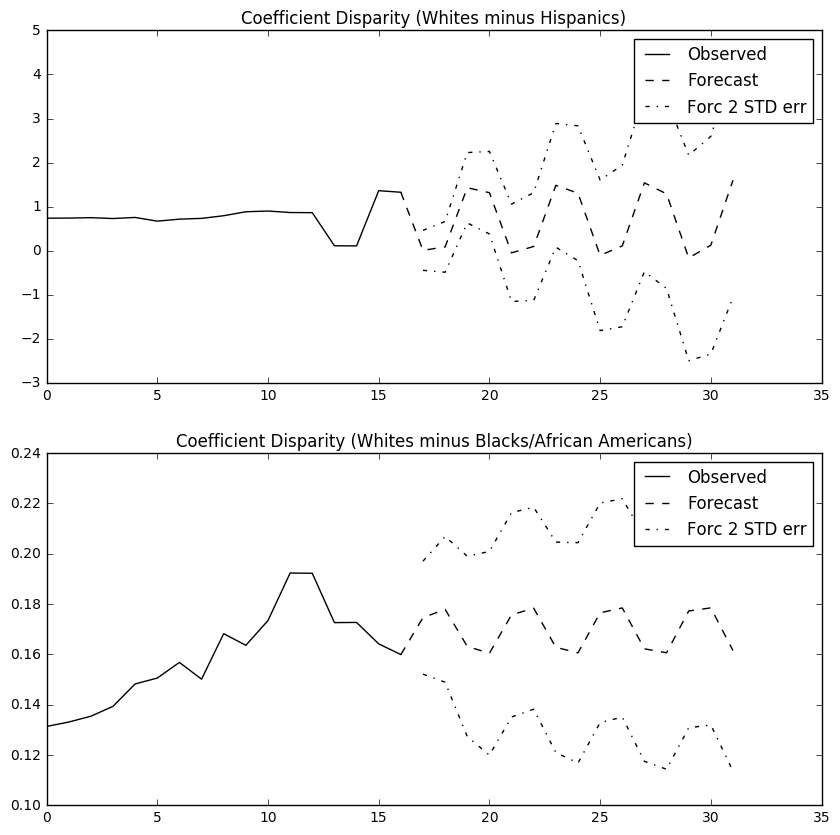

In [307]:
results.plot_forecast(15)
plt.show()

In [296]:
#irf = results.irf(10)

In [297]:
#irf.plot(orth=False)
#plt.show()

In [322]:
all_coeffs = []
white_means = []
black_means = []
years = []
for file_name in files:
    year = file_name[-8:-4]
    years.append(year)
    print("Working on file: ",file_name," for year: ",year)
    
    flattened = pandas.read_csv("final\\"+file_name, low_memory=False)
    #flattened.income = flattened.income.astype(float)
    
    flattened_white = flattened[flattened.White == 1]
    flattened_white.income = flattened_white.income.astype(float)
    white_mean = numpy.mean(flattened_white.income)
    white_means.append(white_mean)

    flattened_black = flattened[flattened["Black or African American"] == 1]
    flattened_black.income = flattened_black.income.astype(float)
    black_mean = numpy.mean(flattened_black.income)
    black_means.append(black_mean)

black_white_mean_incomes = pandas.DataFrame(years, columns = ["YEAR"])
black_white_mean_incomes["Black/African American"] = black_means
black_white_mean_incomes["White"] = white_means
black_white_mean_incomes.to_csv("all_year_mean_incomes\\mean_incomes.csv", index=False)

Working on file:  flattened_2000.csv  for year:  2000


C:\Users\Jitendra Savanur\Anaconda\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Working on file:  flattened_2001.csv  for year:  2001
Working on file:  flattened_2002.csv  for year:  2002
Working on file:  flattened_2003.csv  for year:  2003
Working on file:  flattened_2004.csv  for year:  2004
Working on file:  flattened_2005.csv  for year:  2005
Working on file:  flattened_2006.csv  for year:  2006
Working on file:  flattened_2007.csv  for year:  2007
Working on file:  flattened_2008.csv  for year:  2008
Working on file:  flattened_2009.csv  for year:  2009
Working on file:  flattened_2010.csv  for year:  2010
Working on file:  flattened_2011.csv  for year:  2011
Working on file:  flattened_2012.csv  for year:  2012
Working on file:  flattened_2013.csv  for year:  2013
Working on file:  flattened_2014.csv  for year:  2014
Working on file:  flattened_2015.csv  for year:  2015
Working on file:  flattened_2016.csv  for year:  2016


In [323]:
# prepare the dates index
mdata = pandas.read_csv("all_year_mean_incomes\\mean_incomes.csv", low_memory = False)

import statsmodels.api as sm

from statsmodels.tsa.api import VAR, DynamicVAR

# prepare the dates index
dates = mdata[['YEAR']].astype(str)

yearly = dates["YEAR"]

from statsmodels.tsa.base.datetools import dates_from_str

yearly = dates_from_str(yearly)
yearly

mdata = mdata[["Black/African American", "White"]]
#numpy.diff(mdata, axis = 0)

mdata.index = pandas.DatetimeIndex(yearly)
data = mdata#.diff().dropna()

data

,Black/African American,White
2000-12-31,24529.740464,35167.081953
2001-12-31,25275.058366,35929.314474
2002-12-31,25758.915256,36610.837854
2003-12-31,26305.247936,37082.595538
2004-12-31,27197.120751,38557.929943
2005-12-31,27054.893081,40193.813755
2006-12-31,27118.186162,41290.193485
2007-12-31,28579.125994,43511.076908
2008-12-31,29726.938336,44734.835906
2009-12-31,29663.748450,43911.883935


In [324]:
# make a VAR model
model = VAR(data)

results = model.fit(2)

results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 17, Dec, 2017
Time:                     04:45:58
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    26.8929
Nobs:                     15.0000    HQIC:                   26.4159
Log likelihood:          -230.725    FPE:                3.14375e+11
AIC:                      26.4209    Det(Omega_mle):     1.76836e+11
--------------------------------------------------------------------
Results for equation Black/African American
                               coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------
const                          7973.011672      4979.687830            1.601           0.140
L1.Black/African American         0.484268         0.395134            1.226           0

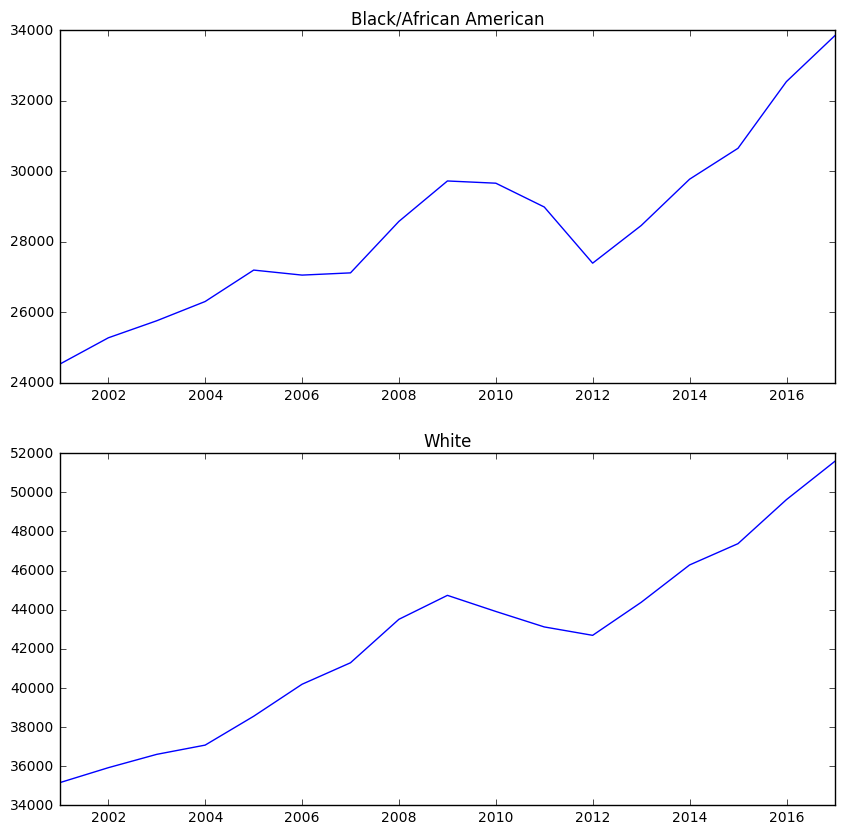

In [325]:
results.plot()
plt.show()

In [329]:
model.select_order(7)

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0        28.77        28.83    3.130e+12        28.70
1        26.45        26.63    3.177e+11        26.25
2        26.58        26.88    4.256e+11        26.25
3        25.66        26.08    2.708e+11        25.19
4       -12.64       -12.10    3.190e-05       -13.24
5       -91.64       -90.97    8.624e-40       -92.37
6      -93.96*      -93.18*   5.043e-42*      -94.83*
7       -91.35       -90.44    1.321e-41       -92.34
* Minimum



{'aic': 6, 'bic': 6, 'fpe': 6, 'hqic': 6}

In [330]:
results = model.fit(maxlags=2, ic='hqic')
lag_order = results.k_ar
lag_order

2

In [334]:
forecasted_incomes = results.forecast(data.values[-lag_order:], 15)

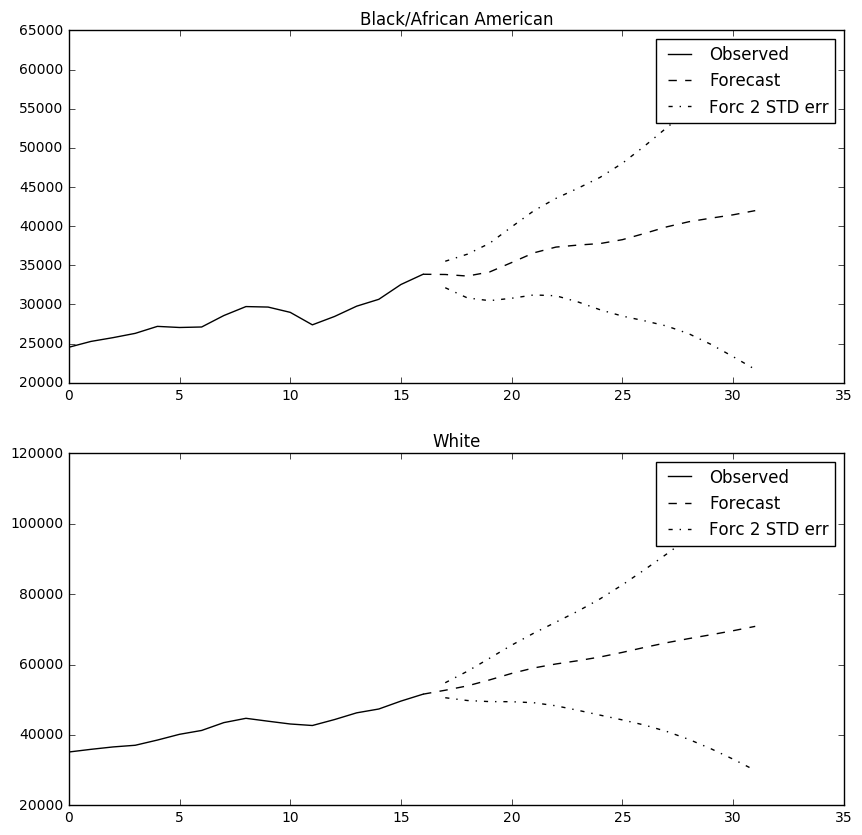

In [333]:
results.plot_forecast(15)
plt.show()

In [363]:
fordiff_data = data[["Black/African American", "White"]]
available_diff = list(np.diff(fordiff_data, axis=1))
av_diff = []
for diff in available_diff:
    av_diff.append(diff[0])
#available_diff = available_diff[0] in available_diff
print(av_diff)

forecasted_diff = list(np.diff(forecasted_incomes, axis=1))
fore_diff = []
for diff in forecasted_diff:
    fore_diff.append(diff[0])
#forecasted_diff = forecasted_diff[0] in forecasted_diff

print(fore_diff)

[10637.341488964783, 10654.256108018959, 10851.922598747697, 10777.347601604084, 11360.809191957684, 13138.920673753957, 14172.007322537949, 14931.950914286284, 15007.897569540128, 14248.135484318576, 14133.192894872853, 15298.217731599405, 15917.647091852959, 16511.042427753717, 16721.72791288462, 17077.837691701923, 17732.081660244075]
[18879.105111518329, 20312.848508107345, 21485.2769168823, 22127.586843481178, 22443.922186064723, 22833.26903905037, 23508.293167762451, 24369.210014862547, 25176.168716733664, 25794.866260417613, 26285.85437984873, 26802.300985290341, 27434.632198805077, 28149.658571649765, 28851.76901286986]


In [364]:
av_diff.extend(fore_diff)
print(len(av_diff))
print(len(fore_diff))

32
15


In [365]:
y = 2000
yrs = []
while y < 2032:
    yrs.append(str(y))
    y += 1
len(yrs)

32

In [366]:
diff_df = pandas.DataFrame(yrs, columns = ["YEAR"])
diff_df["Past-Current-Forecasted Difference in White and Black/African American incomes"] = av_diff

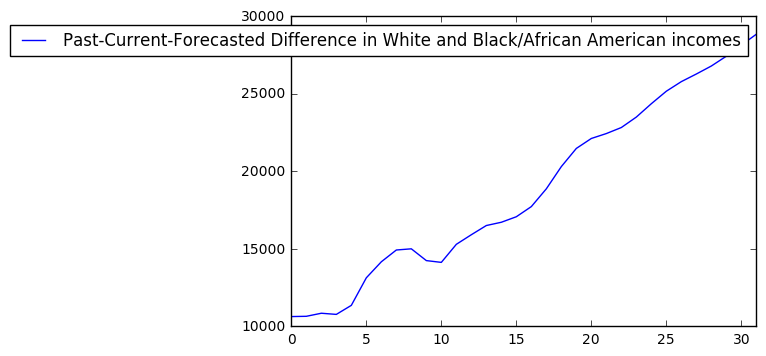

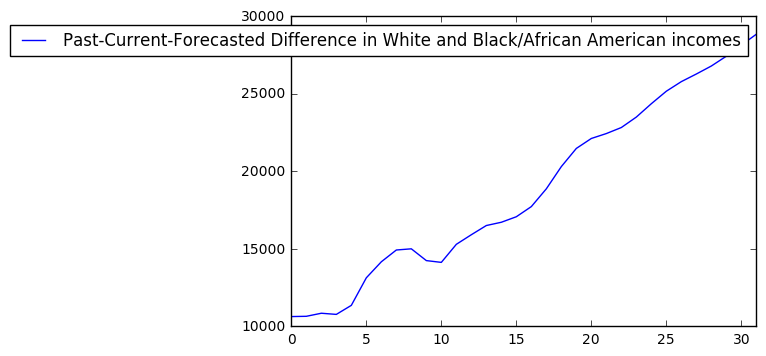

In [369]:
diff_df.plot()
plt.show()

In [371]:
year_wise_coeffs = pandas.read_csv("all_year_coeffs\\all_year_coeff.csv", low_memory = False)

In [400]:
year_wise_coeffs_2016 = year_wise_coeffs[year_wise_coeffs.YEAR == 2016]
year_wise_coeffs_means = dict(year_wise_coeffs.mean())
year_wise_coeffs_means

{'ADMINISTRATION': -0.87086360155996945,
 'AGE': 0.16535464292033208,
 'AGRICULTURE': -0.98058285633182796,
 'Alaska Native': 0.58326289831005129,
 'American Indian': 0.56208737483351923,
 'American Indian and Alaska Native tribes specified': 0.60142424305050424,
 'Asian': 0.7481147859394528,
 'Black or African American': 0.56601599211906073,
 'COMMUNITY_SERVICES': -1.0787756808255924,
 'CONSTRUCTION': -0.94060883646411286,
 'DOMESTIC_SERVICES': -1.0596114937074017,
 'EDUCATION': 0.35800348309838281,
 'ENTERTAINMENT': -1.0571758253993391,
 'EXTRACTION': -0.54753090710181607,
 'FINANCE': -0.54314545771171208,
 'Federal government employee': 0.16576495574933103,
 'Female': -0.18253195865372535,
 'HISPANIC': -0.041056819961832539,
 'INFORMATION_TECH': -0.69399894472180634,
 'Local government employee': 0.05714755080802552,
 'MANUFACTURING': -0.7596866743319497,
 'MEDICAL': -0.74189054612539285,
 'MILITARY': -1.0370608739105325,
 'Male': 0.18253195864736119,
 'Native Hawaiian': 0.627881369

In [398]:
#coeff_dict = year_wise_coeffs_means.to_dict()

In [401]:
import operator
coeff_dict
coeff_dict_final = {}
for K, V in year_wise_coeffs_means.items():
    coeff_dict_final[V] = K
    #for K1, V1 in V.items():
     #   coeff_dict_final[V1] = K
#coeff_dict_final = sorted(coeff_dict_final)
sorted_coeff_dict_final = sorted(coeff_dict_final.items(), key=operator.itemgetter(0),reverse=True)
sorted_coeff_dict_final

[(2008.0, 'YEAR'),
 (0.7481147859394528, 'Asian'),
 (0.72512730029581696, 'White'),
 (0.71525257371202922, 'Some Other Race'),
 (0.64255887399075906, 'Two or More Races'),
 (0.62788136954223184, 'Native Hawaiian'),
 (0.60142424305050424, 'American Indian and Alaska Native tribes specified'),
 (0.58326289831005129, 'Alaska Native'),
 (0.56601599211906073, 'Black or African American'),
 (0.56208737483351923, 'American Indian'),
 (0.5198759620028941, 'Self-employed own business'),
 (0.35800348309838281, 'EDUCATION'),
 (0.18253195864736119, 'Male'),
 (0.16576495574933103, 'Federal government employee'),
 (0.16535464292033208, 'AGE'),
 (0.072370223320857241, 'State government employee'),
 (0.05714755080802552, 'Local government employee'),
 (0.015219522460530452, 'Private charitable company employee'),
 (-0.0231443229901661, 'Private profit company employee'),
 (-0.041056819961832539, 'HISPANIC'),
 (-0.069143359081023134, 'Self-employed not own business'),
 (-0.18253195865372535, 'Female'),

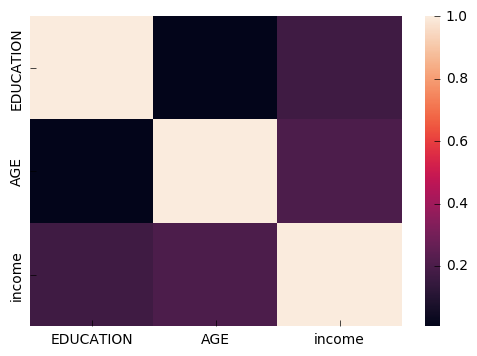

In [395]:
import seaborn as sb
data_2016 = pandas.read_csv("final\\flattened_2016.csv", low_memory=False)
data_2016_age_edu_inc = data_2016[['EDUCATION', 'AGE', 'income']]

data_2016_age_edu_inc = data_2016_age_edu_inc[data_2016_age_edu_inc.EDUCATION != 'EDUCATION']

data_2016_age_edu_inc.EDUCATION = data_2016_age_edu_inc.EDUCATION.astype(float)
data_2016_age_edu_inc.EDUCATION = stats.zscore(data_2016_age_edu_inc.EDUCATION)

data_2016_age_edu_inc.AGE = data_2016_age_edu_inc.AGE.astype(float)
data_2016_age_edu_inc.AGE = stats.zscore(data_2016_age_edu_inc.AGE)

data_2016_age_edu_inc.income = data_2016_age_edu_inc.income.astype(float)
data_2016_age_edu_inc.income = stats.zscore(data_2016_age_edu_inc.income)
corr = data_2016_age_edu_inc.corr()

#'EDUCATION', 'AGE', 'income'
#xticks = ['Rooms','Bedrooms','Bathrooms','Finished Sq Ft','Total tax','Fire place count','Building quality']
#yticks = ['Rooms','Bedrooms','Bathrooms','Finished Sq Ft','Total tax','Fire place count','Building quality']


#sb.heatmap(corr, xticklabels = xticks, yticklabels = yticks)
sb.heatmap(corr)
#plt.yticks(rotation=0)
#plt.xticks(rotation=90)
plt.show()